<H1>Read and Write Data</H1>

<H2>Creating NetCDF files with Python</H2>

Thanks to all contributors:

Ag Stephens, Andy Heaps and Tommy Godfrey.


<H1>We are using netCDF4-python</H1>

There are many options for working with NetCDF files in Python. In this example we have chosen to highlight the use of the netCDF4-python module. 

The netCDF4-python module is useful because:
 It implements the basic "classic" model as well as more advanced features.
 It provides a simple interface to the NetCDF structure.
 It has been used as the underlying NetCDF I/O layer for many more advanced packages.

<H1>Creating a netCDF file</H1>

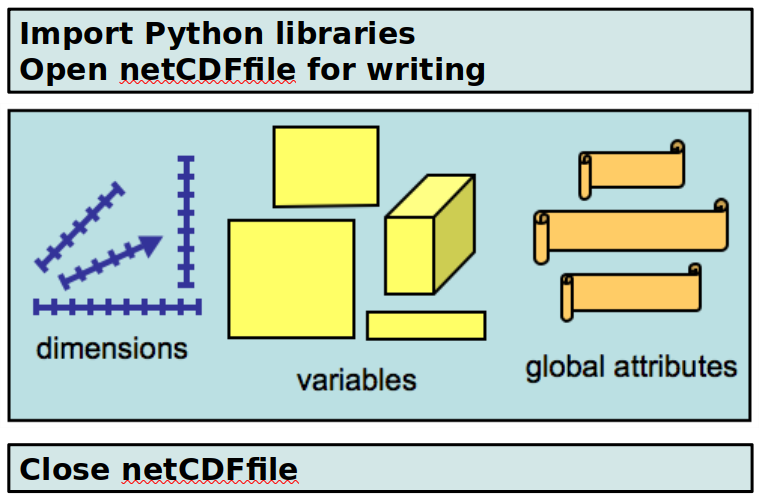

<H1>Import libraries</H1>

In [1]:
from netCDF4 import Dataset
import numpy as np
from numpy.random import uniform
from datetime import datetime, timedelta
from netCDF4 import num2date, date2num

We are making a four dimensional dataset based on longitude, latitude, height and time.

<H1>Creating/Opening a netCDF file</H1>
To create a netCDF file from python, you simply call the Dataset() constructor. This is also the method used to open an existing netCDF file. 

If the file is open for write access ("w", "r+" or "a"), you may write any type of data including new dimensions, groups, variables and attributes.

This tutorial will focus exclusively on the NetCDF "Classic" data model using: NETCDF4_CLASSIC

<H1>Creating a NetCDF file</H1>
Open a new NetCDF file ("test.nc") in write ("w") mode:

In [2]:
dataset = Dataset('test.nc', 'w', format='NETCDF4_CLASSIC')

<H1>Creating the dimensions</H1>

In [3]:
# Create dimensions
longitude = dataset.createDimension('longitude', 144)
latitude = dataset.createDimension('latitude', 73)
level = dataset.createDimension('level', 10)
time = dataset.createDimension('time', None)

<H1>Variables</H1>
NetCDF variables behave much like python multi-dimensional arrays in numpy. However, unlike numpy arrays, netCDF4 variables can be appended to along the 'unlimited' dimension (a.k.a. the "record dimension"). 

To create a netCDF variable, use:
    Dataset.createVariable(var_id, type, dimensions) 

This method has two mandatory arguments:   the variable ID (a Python string) and the variable data type. Additionally a tuple of dimensions can be provided.

<H1>Creating the variables</H1>


In [4]:
# Create coordinate variables for 4-dimensions
times = dataset.createVariable('time', np.float64, ('time',))
 
levels = dataset.createVariable('level', np.int32, ('level',))
 
latitudes = dataset.createVariable('latitude', np.float32, ('latitude',))

longitudes = dataset.createVariable('longitude', np.float32, ('longitude',)) 

# Create the actual 4-d variable
temp = dataset.createVariable('temp', np.float32, ('time','level','latitude','longitude'))

<H1>Attributes (global)</H1>
Global attributes are set by assigning values to Dataset instance variables. Attributes can be strings, numbers or sequences. Returning to our example:




In [5]:
# Global Attributes
dataset.description = 'bogus example script' 
dataset.history = 'Created on a Friday' 
dataset.source = 'netCDF4 python module tutorial'

<H1>Variable attributes</H1>
Variable attributes are set by assigning values to Variable instance variables:

In [6]:
# Assign variable attributes
longitudes.standard_name='longitude'
longitudes.units = 'degree_east'

latitudes.standard_name='latitude'
latitudes.units = 'degree_north' 

levels.standard_name='pressure'
levels.units = 'hPa'

times.standard_name='time'
times.units = 'hours since 0001-01-01 00:00:00' 
times.calendar = 'gregorian'

temp.standard_name='air_temperature'
temp.units = 'K'

<H1>Writing data</H1>
Now that you have a netCDF Variable instance, how do you put data into it? You can just treat it like an array and assign data to a slice.

In [7]:
# Writing data
longitudes[:] = np.arange(-180, 180, 2.5)
latitudes[:] = np.arange(-90, 91, 2.5)
levels[:] = [1000, 900, 700, 500, 300, 100, 70, 50, 30, 10]

<H1>Growing data along the unlimited dimension</H1>
Unlike NumPy's array objects, netCDF Variable objects that have an unlimited dimension will grow along that dimension if you assign data outside the currently defined range of indices.

In [8]:
temp[0:5,:,:,:] = uniform(size=(5,10,73,144))

NOTE: uniform is numpy.random.uniform(size = X) returns values from a uniform distribution in a numpy array with dimensions expressed in a tuple X.

<H1>Defining date/times correctly</H1>
Time coordinate values pose a special challenge to netCDF users. Most metadata standards (such as CF and COARDS) specify that time should be measure relative to a fixed date using a certain calendar, with units specified like: 

		"hours since YY:MM:DD hh-mm-ss"

These units can be awkward to deal with, without a utility to convert the values to and from calendar dates. The functions  num2date() and date2num() are provided with this package to do just that. Here's an example of how they can be used…



In [9]:
# Fill in times
dates = []
for n in range(5):
       dates.append(datetime(2001, 3, 1) + n * timedelta(hours=12))

times[:] = date2num(dates, units=times.units, calendar=times.calendar)


<B>num2date()</B> converts numeric values of time in the specified units and calendar to datetime objects, and <B>date2num()</B> does the reverse

 <H1>Viewing the date/times</H1>

In [10]:
print('time values (in units): ', times.units)
print(times[:])

time values (in units):  hours since 0001-01-01 00:00:00
[17533104. 17533116. 17533128. 17533140. 17533152.]


In [11]:
print('dates corresponding to time values:')
print(num2date(times[:], units=times.units, calendar=times.calendar))

dates corresponding to time values:
[cftime.DatetimeGregorian(2001, 3, 1, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2001, 3, 1, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2001, 3, 2, 0, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2001, 3, 2, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(2001, 3, 3, 0, 0, 0, 0, has_year_zero=False)]


<H1>Finally, let's write the file</H1>
Simply...

In [12]:
dataset.close()

<H1>What does the output look like?</H1>

In [13]:
!ncdump -h test.nc

netcdf test {
dimensions:
	longitude = 144 ;
	latitude = 73 ;
	level = 10 ;
	time = UNLIMITED ; // (5 currently)
variables:
	double time(time) ;
		time:standard_name = "time" ;
		time:units = "hours since 0001-01-01 00:00:00" ;
		time:calendar = "gregorian" ;
	int level(level) ;
		level:standard_name = "pressure" ;
		level:units = "hPa" ;
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:units = "degree_north" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:units = "degree_east" ;
	float temp(time, level, latitude, longitude) ;
		temp:standard_name = "air_temperature" ;
		temp:units = "K" ;

// global attributes:
		:description = "bogus example script" ;
		:history = "Created on a Friday" ;
		:source = "netCDF4 python module tutorial" ;
}


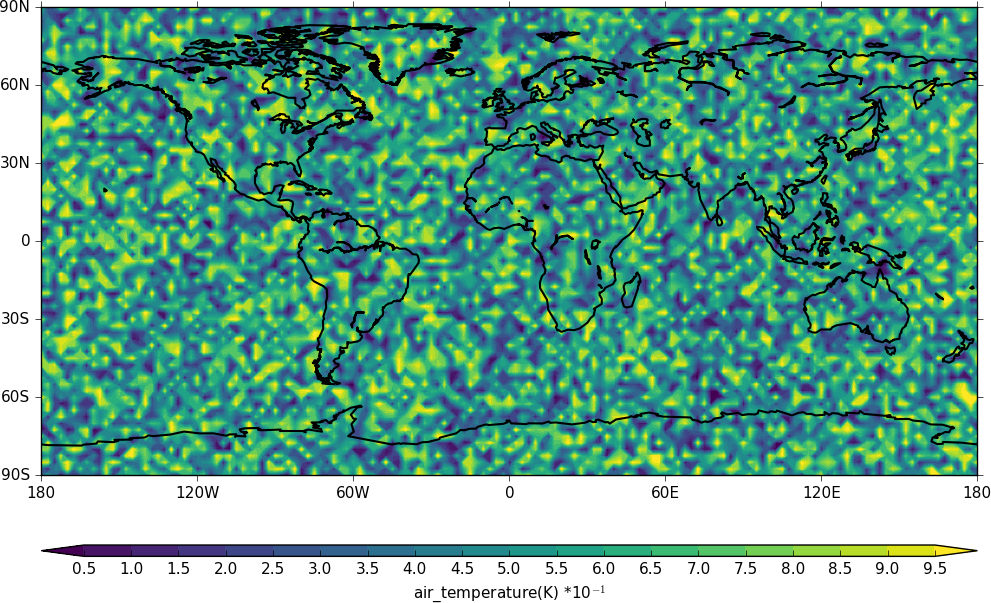

<H1>Further reading</H1>
Python-netCDF4:
	http://unidata.github.io/netcdf4-python
